In [2]:
import matplotlib.pyplot as plt
import numpy
import os
import librosa
import librosa.display
import IPython.display as ipd

audio_fpath = "audio/wav/"
audio_clips = os.listdir(audio_fpath)

In [55]:
clip_1, sr = librosa.load(audio_fpath+audio_clips[0], sr=44100)
clip_2, sr = librosa.load(audio_fpath+audio_clips[1], sr=44100)
clip_3, sr = librosa.load(audio_fpath+audio_clips[2], sr=44100)
clip_4, sr = librosa.load(audio_fpath+audio_clips[3], sr=44100)
clip_5, sr = librosa.load(audio_fpath+audio_clips[4], sr=44100)
clip_6, sr = librosa.load(audio_fpath+audio_clips[5], sr=44100)
clip_7, sr = librosa.load(audio_fpath+audio_clips[6], sr=44100)
clip_8, sr = librosa.load(audio_fpath+audio_clips[7], sr=44100)

s = clip_7

Each audio clip consists of the same spoken phrase with a different non-speech interruption at the same location in the track.  

**Non-speech content:** 
- clip_1: bang
- clip_2: big sniff
- clip_3: pop can
- clip_4: cough
- clip_5: little sniffs
- clip_6: scratching
- clip_7: slurp
- clip_8: yawn


**LENGTH OF SAMPLE**

In [56]:
sl = librosa.get_duration(y=s, sr=sr)
print (sl)

11.16734693877551


**BASIC AUDIO WAVEFORM**

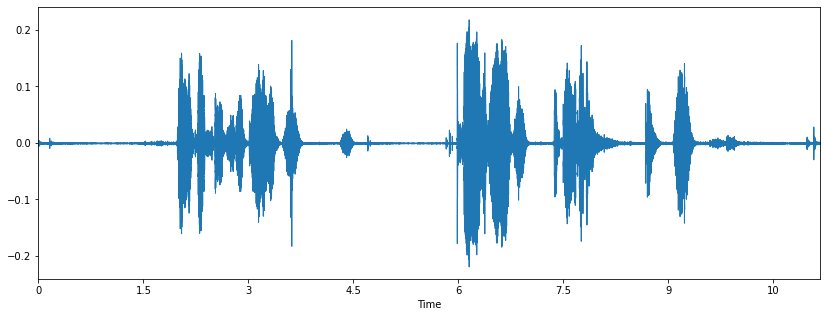

In [57]:
plt.figure(figsize=(14, 5))

librosa.display.waveplot(s, sr=sr)

**SPECTROGRAM**

/Users/juliaseidman/Documents/Code/podball/venv/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/juliaseidman/Documents/Code/podball/venv/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/juliaseidman/Documents/Code/podball/venv/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


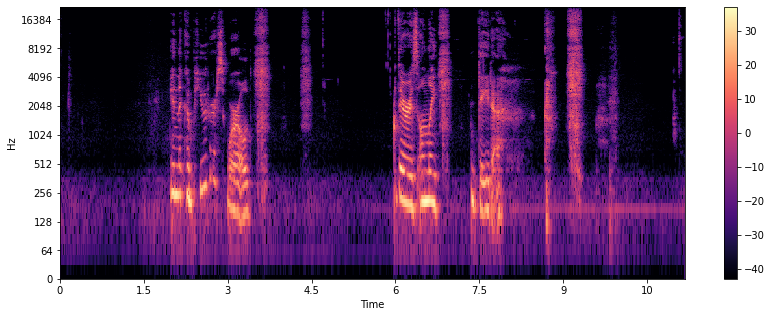

In [60]:
S = librosa.stft(s)
Sdb = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Sdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

**PERCUSSIVES & HARMONICS**

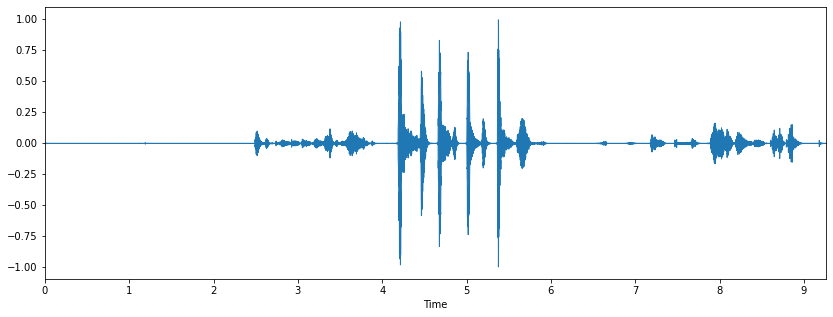

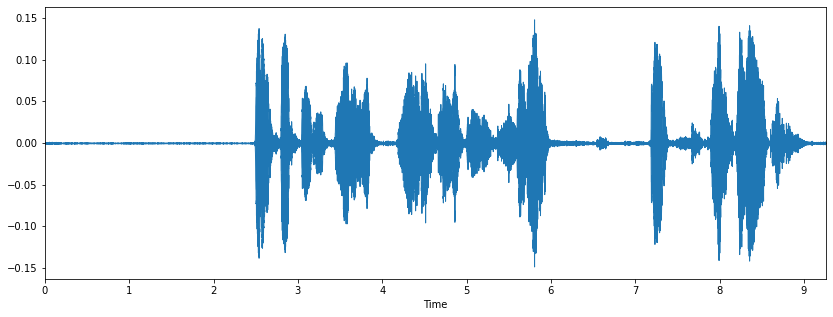

In [47]:
s_harmonic, s_percussive = librosa.effects.hpss(s)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(s_percussive, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(s_harmonic, sr=sr)

**ZERO-CROSSING RATE**
*By default, ZCR is plotted in terms of windows rather than time.  x-axis is # of rolling windows of duration frame_length in , beginning every hop_length*

798


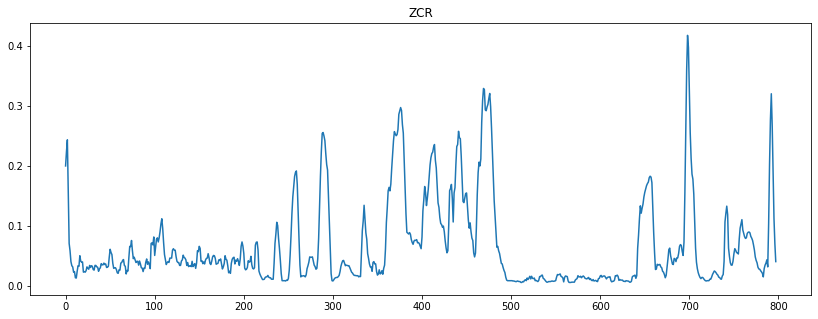

In [48]:
s_zeros = librosa.feature.zero_crossing_rate(s, frame_length=2048, hop_length=512)
plt.figure(figsize=(14, 5))
plt.plot(s_zeros[0])
plt.title("ZCR")
# print(ns_zeros.min())
# print(ns_zeros[0].min())
# print(ns_zeros.max())
# print(ns_zeros[0].max())
print (s_zeros[0].size)

In order to make ZCR plot along the same x-axis (time in seconds) as other data, the following steps must be taken:

1. Determine length in time of frame_length:
- sr=44100 samples/second
- frame_length = 2048 samples

2. Determine frames per second

3. Account for overlap between frames - hop_length

4. Confirm by multiplying by sample length

5. Use adjust frames per second to adjust ZCR display

In [58]:
spf = numpy.divide(2048, sr)
print(spf)

fps = numpy.divide(1, spf)
print(fps)

fo = numpy.divide(512, 2048)
print(fo)

fps_adjusted = numpy.divide(fps, fo)
print (fps_adjusted)

confirm = fps_adjusted * sl
print(confirm)

0.046439909297052155
21.533203125
0.25
86.1328125
961.8750000000001


Text(0.5, 1.0, 'ZCR')

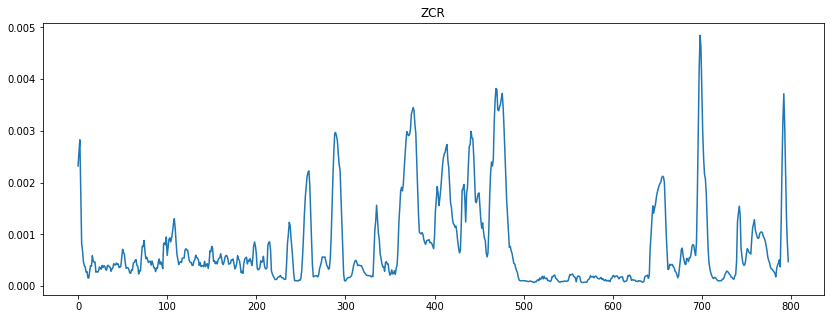

In [59]:
s_zeros_scaled = numpy.divide(s_zeros, fps_adjusted) 
plt.figure(figsize=(14, 5))
plt.plot(s_zeros_scaled[0])
plt.title("ZCR")

What I learned here is that dividing the numpy array s_zeros divides the values on the Y axis, not the values on the X axis.  In practice, this won't be a problem - instead, whatever frame values have a ZCR that exceeds the limits we specify will just have to be divided by the scaling factor to get the timestamp.  Too much work to do that for the visual.